In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def h(t):
    if 1<=t and t<=10:
        return 1
    elif 11<=t and t<=20:
        return 0.1
    elif 21<=t:
        return 1

In [3]:
T=30

In [4]:
t=np.linspace(0,T,T+1)
n=len(t)
x=np.zeros(n)
x[0]=np.random.normal(0,1,1)
y=np.zeros(n)
for i in range(1,n):
    x[i]=0.8*x[i-1]+np.random.normal(0,0.4)
    y[i]=h(i)*x[i]+np.random.normal(0,0.1)

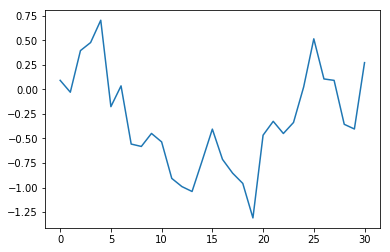

In [5]:
plt.plot(t,x)

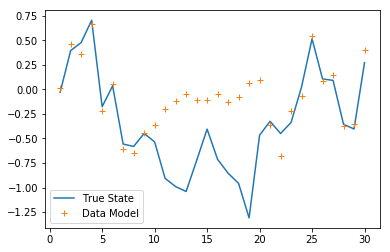

In [6]:
plt.plot(t[1:],x[1:])
#plt.plot(t[1:],y[1:])
plt.plot(t[1:],y[1:],"+")
plt.legend(["True State","Data Model"])
plt.show()

# EXTENDED KALMAN

In [85]:
T=30
t=np.linspace(1,T,T)
n=len(t)
x=np.zeros(n)
y=np.zeros(n-1)
x[0]=np.random.normal(0.1,0.01)
error=np.random.normal(0,0.001,len(t))
error1=np.random.normal(0,0.05,len(t))
for i in range(1,n):
    x[i]=0.9*x[i-1]*(1-x[i-1])+ error[i]
    y[i-1]=x[i]+error1[i]

In [86]:
len(y)

29

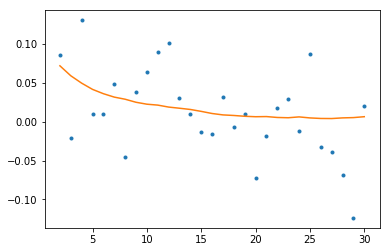

In [87]:
plt.plot(t[1:],y,".")
plt.plot(t[1:],x[1:])

In [44]:
def kalman_filter(sigma,mean,r2,q2,alpha,H):
    forecast=np.zeros(T+1)
    forecast_u=np.zeros(T+1)
    gain_matrix=np.zeros(T+1)
    mean_new=np.zeros(T+1)
    sigma_new=np.zeros(T+1)
    mean_old=alpha*mean
    sigma_old=q2+alpha*sigma*alpha
    
    for i in range(1,T+1):
        forecast[i]=mean_old
        forecast_u[i]=sigma_old
        gain_matrix[i]=sigma_old*H*(H*sigma_old*H+r2)**(-1)
        sigma_new[i]=(1-gain_matrix[i]*H)*sigma_old
        mean_new[i]=mean_old+gain_matrix[i]*(y[i]-H*mean_old)
        mean_old=alpha*mean_new[i]
        sigma_old=q2+(alpha**2)*sigma_new[i]
        
    return sigma_new, mean_new, gain_matrix,forecast,forecast_u

In [45]:
sigma=0.01
mean=0.1
r2=0.05
q2=0.001
alpha=0.9
H=1
Sigma_new,Mu_new,gain_Matrix,forecast,forecast_u=kalman_filter(sigma,mean,r2,q2,alpha,H)

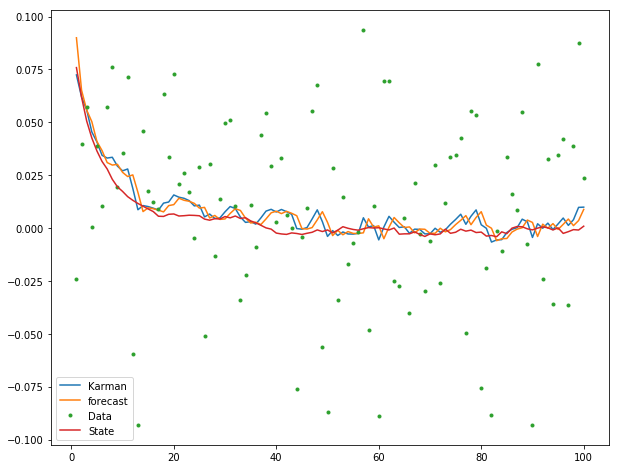

In [46]:
plt.figure(figsize=(10,8))
plt.plot(t[1:],Mu_new[1:])
plt.plot(t[1:],forecast[1:])
plt.plot(t[1:],y[1:],".")
plt.plot(t[1:],x[1:])
plt.legend(["Karman","forecast","Data","State"])

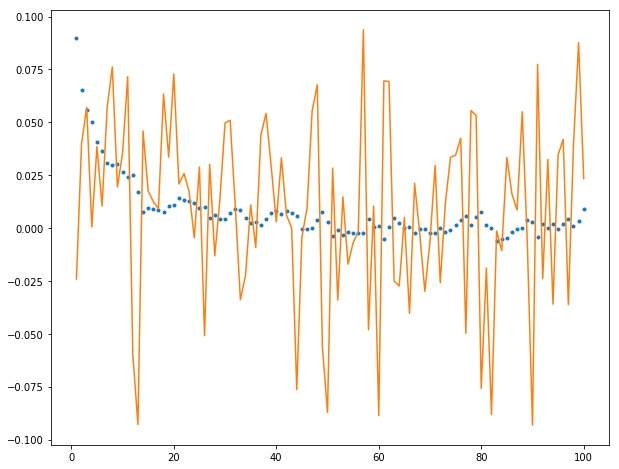

In [47]:
plt.figure(figsize=(10,8))
plt.plot(t[1:],forecast[1:],".")
plt.plot(t[1:],y[1:])